In [1]:
# import potential libraries for data analysis
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns



# allow display of multiple outputs by running one code cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In this lab, we will apply learned concepts from topic 1-2's lecture to perform data cleaning on a given house price prediction data set.

This dataset (AmesHousing.csv) contains 2,930 house listing , each record has 82 attributes. The dataset was provided in an article, which can be accessed via https://jse.amstat.org/v19n3/decock.pdf. The description of attributes can be accessed via https://jse.amstat.org/v19n3/decock/DataDocumentation.txt.

Our goal is to predict SalePrice of a house listing.

Please follow the markdown description and code comment to fill in the code required to perform the corresponding task.


Step 1: Data Type Exploration
Answer the following three questions using code and results.
1) How many data entries/objects?
2) What are the attribute types?
3) Are there any missing values? Which attributes have missing values? Can you visualize the missing value number per attribute using missingno library?

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


(2930, 82)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

<Axes: >

<Axes: >

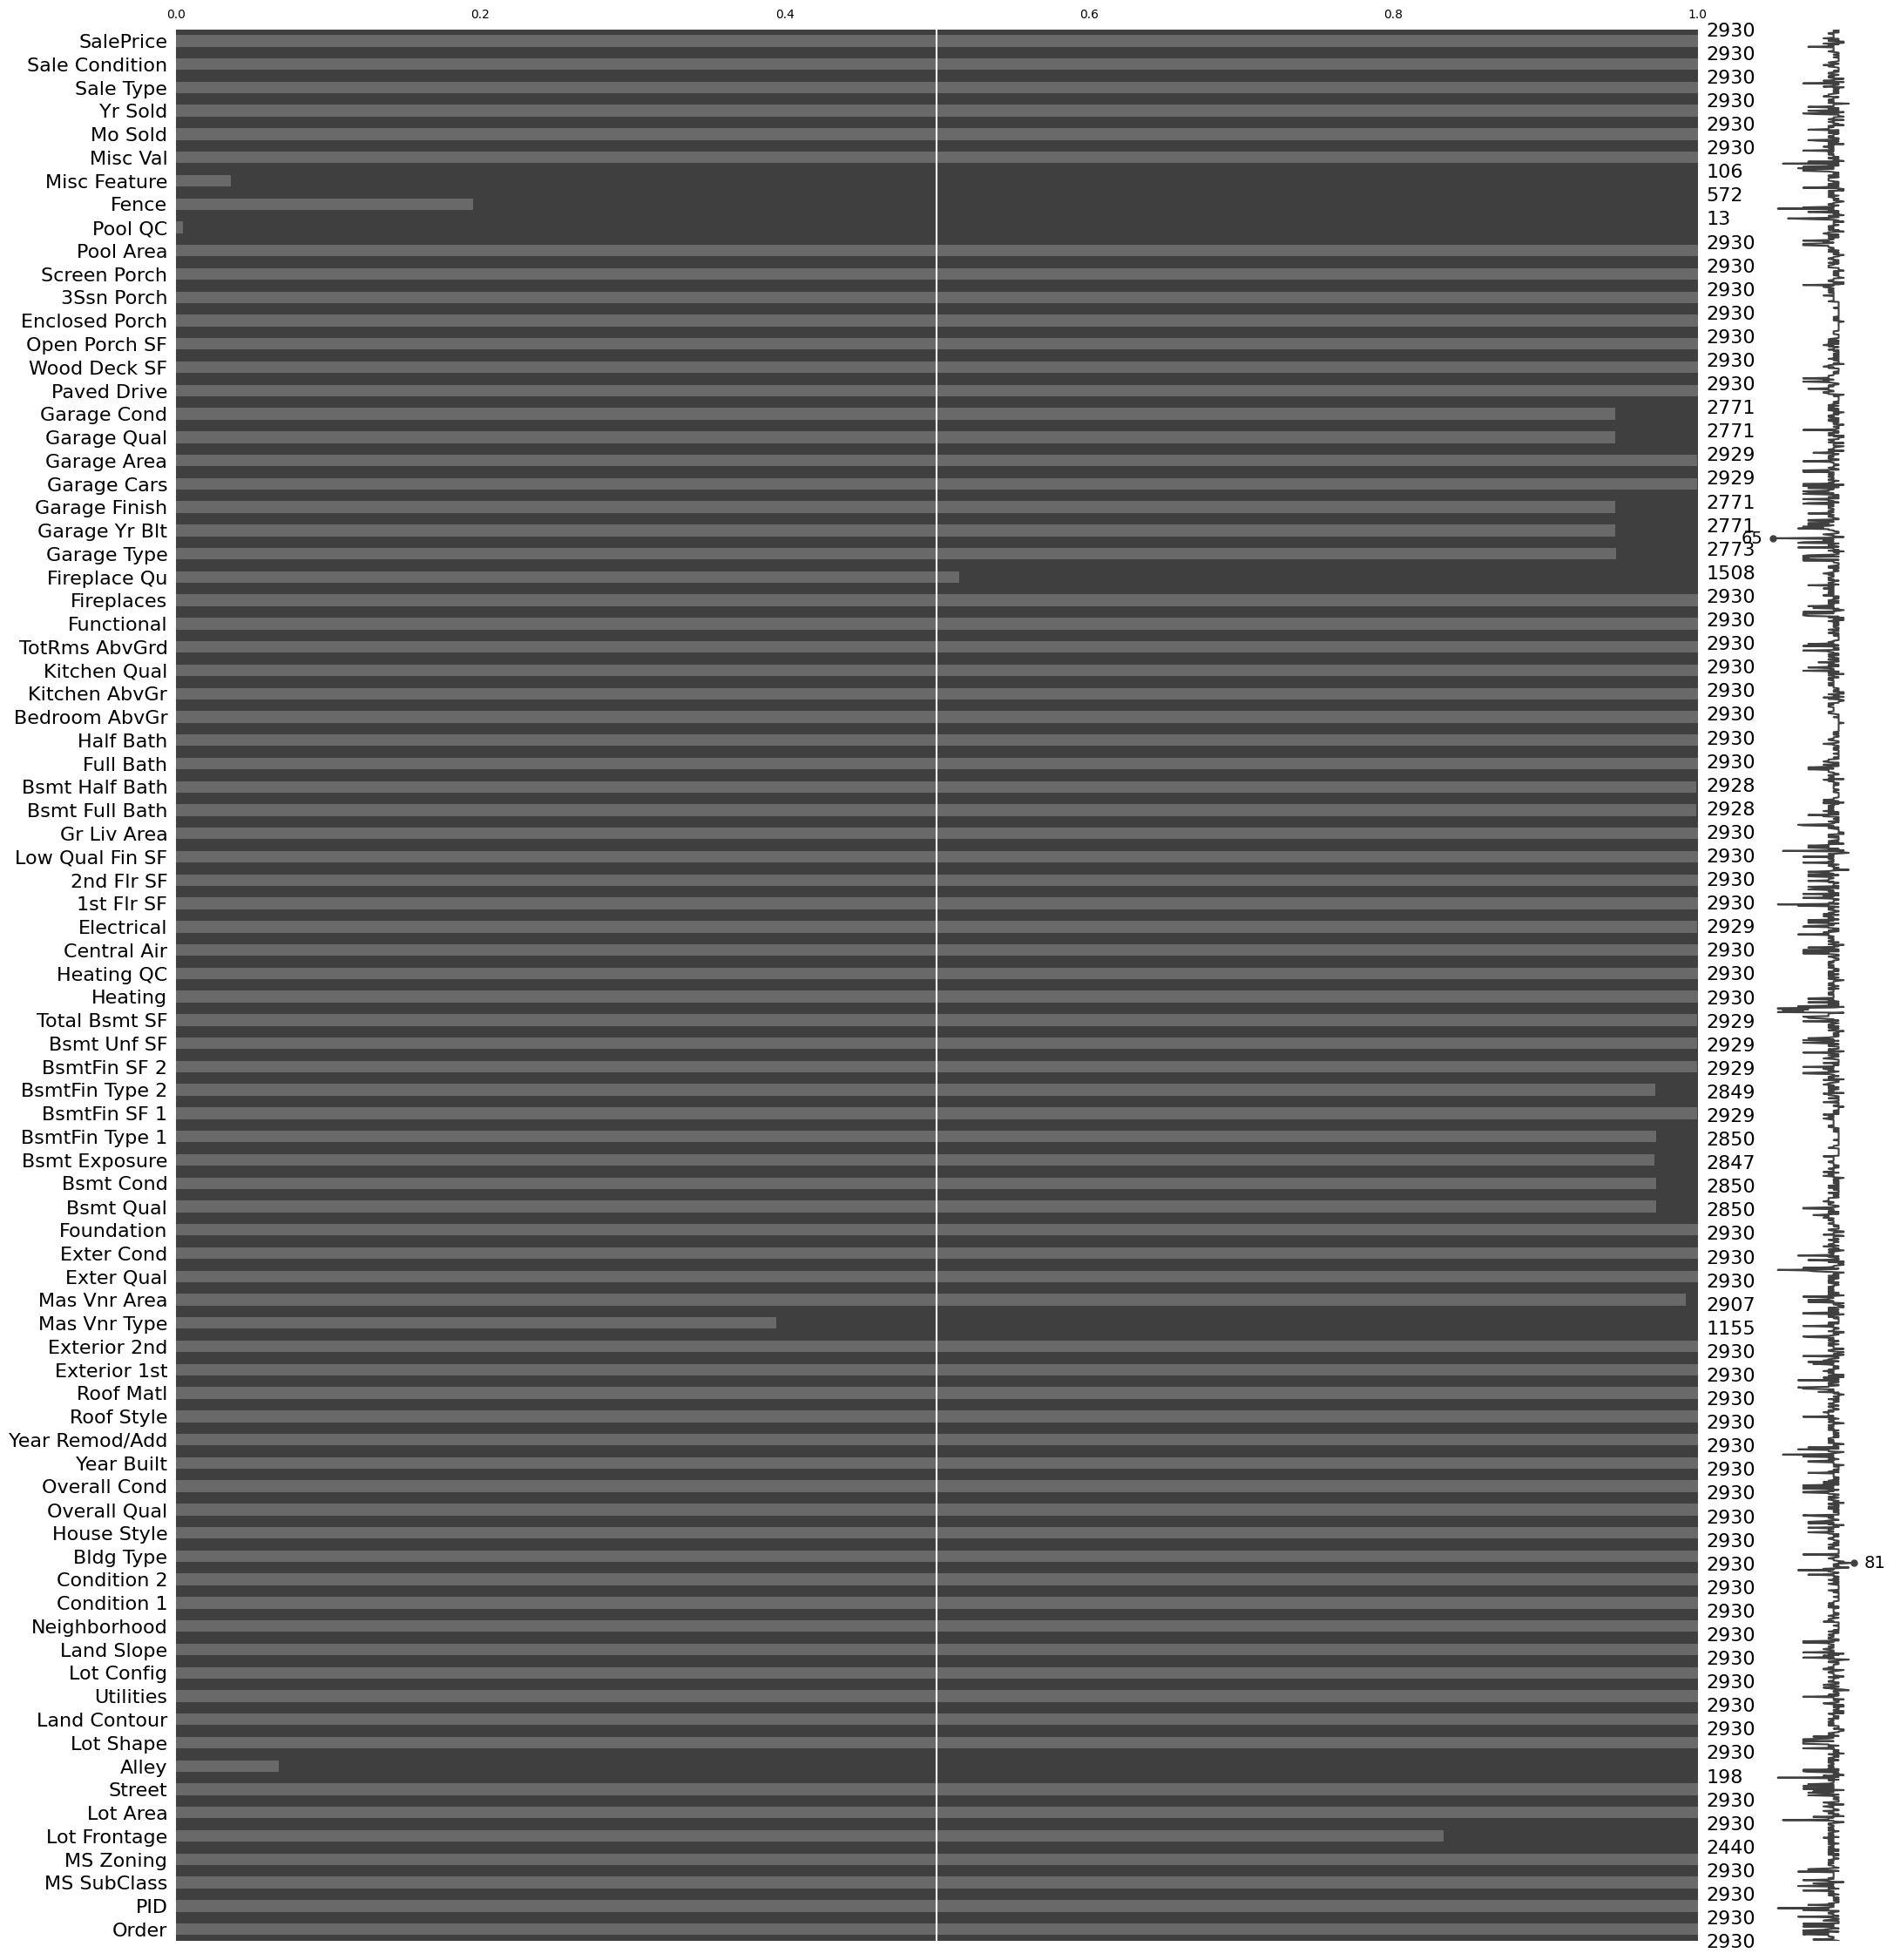

In [2]:
# put your code for implementing Step 1 in this code block
# you many need pd.read_csv, pd.head(), pd.info(), pd.describe(), msno.matrix(), msno.bar()

df = pd.read_csv('AmesHousing.csv')
df.head()
df.shape
df.info()
df.describe()
df.dtypes.unique()
df.isna().sum()
df.isna().sum()[df.isna().sum() > 0]
msno.matrix(df)
msno.bar(df)


In [3]:
# Check which columns are categorical

df.select_dtypes(include='object').columns


Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [4]:
# Check for missing values
df.isna().sum()
# Print columns with missing values
print(df.columns[df.isna().any()])

# Let's consider attributs without missing values
df_parent = df.copy()
df.dropna(axis=1, inplace=True)

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')


In [ ]:
df.shape

(2930, 55)

Step 2: Attribute analysis
Pick the most interesting attribute, i.e., sale price of house, describe the common value, distribution, variance of this attribute values.

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

6381883615.6884365

{'whiskers': [<matplotlib.lines.Line2D at 0x7c5a17018a90>,
 'caps': [<matplotlib.lines.Line2D at 0x7c5a17018fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c5a170187f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c5a17019510>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c5a170197b0>],
 'means': []}

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Value')

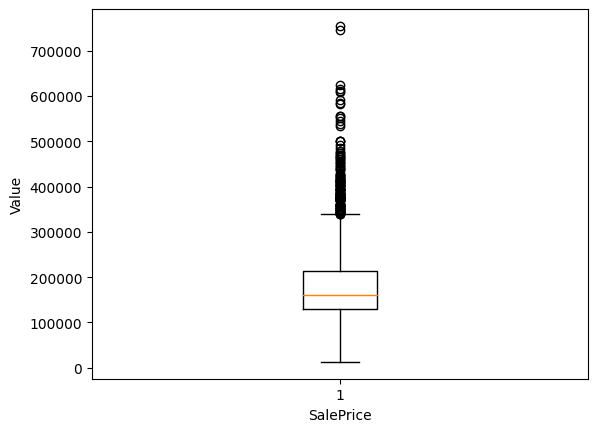

(array([ 146., 1333.,  908.,  329.,  134.,   51.,   14.,    9.,    4.,
           2.]),
 array([ 12789. ,  87010.1, 161231.2, 235452.3, 309673.4, 383894.5,
        458115.6, 532336.7, 606557.8, 680778.9, 755000. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'SalePrice')

Text(0, 0.5, 'Frequency')

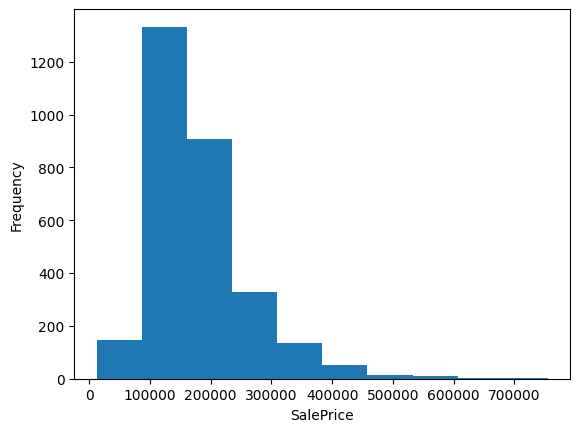

In [5]:
# put your code for implementing Step 2 in this code block
# you may need plt (matplotlib.pyplot), plt.hist(), plt.boxplot(), plt.show(), pd.Series.describe(), pd.Series.var()


# 5-point summary of SalePrice
df['SalePrice'].describe()

# Calculating variance
df['SalePrice'].var()

# boxplot of SalePrice
plt.boxplot(df['SalePrice'])
plt.xlabel('SalePrice')
plt.ylabel('Value')
plt.show()

# histogram of SalePrice
plt.hist(df['SalePrice'])
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


Step 3: Decide whether need to perform feature scaling, e.g., log transformation, for target attribute (sale price) and other numeric features that may be useful for your price prediction model. Note: first extract all numeric attributes and then check the skewness of the values in each attribute.

In [6]:
# put your code for implementing Step 3 in this code block
# you may need pd.select_dtypes(), pd.skew()

numeric_features = df.select_dtypes(include=['int64', 'float64'])

# Calculate skewness for each numeric column
numeric_features.skew()

# SalePrice is highly skewed, so log transform it
df['SalePrice'] = np.log(df['SalePrice'])

# Check skewness again
df['SalePrice'].skew()

Order               0.000000
PID                 0.055886
MS SubClass         1.357579
Lot Area           12.820898
Overall Qual        0.190634
Overall Cond        0.574429
Year Built         -0.604462
Year Remod/Add     -0.451863
1st Flr SF          1.469429
2nd Flr SF          0.866457
Low Qual Fin SF    12.118162
Gr Liv Area         1.274110
Full Bath           0.171952
Half Bath           0.697713
Bedroom AbvGr       0.305694
Kitchen AbvGr       4.313825
TotRms AbvGrd       0.753543
Fireplaces          0.739215
Wood Deck SF        1.842678
Open Porch SF       2.535386
Enclosed Porch      4.014446
3Ssn Porch         11.403795
Screen Porch        3.957467
Pool Area          16.939142
Misc Val           21.999788
Mo Sold             0.192596
Yr Sold             0.134862
SalePrice           1.743500
dtype: float64

-0.014793439509736364

Step 4: check correlation between attributes (numeric and categorical) with sale price of house, this is mainly for selecting features you want to consider in the later regression model.

First we will need to encode categorical features

for ordinal we will use label encoding
others, one-hot-encoding

In [7]:
cateogrical_features_list = df.select_dtypes(include='object').columns.tolist()
cateogrical_features_list

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Heating',
 'Heating QC',
 'Central Air',
 'Kitchen Qual',
 'Functional',
 'Paved Drive',
 'Sale Type',
 'Sale Condition']

In [8]:
nominal = ['MS Zoning', 'Street', 'Land Contour',
           'Lot Config','Neighborhood', 'Condition 1',
           'Condition 2','Bldg Type','House Style',
           'Roof Style','Roof Matl','Exterior 1st','Exterior 2nd',
           'Foundation','Heating','Central Air','Sale Type','Sale Condition'
           ]
ordinal = ['Lot Shape', 'Utilities', 'Land Slope','Exter Qual',
           'Exter Cond','Heating QC','Kitchen Qual','Functional',
           'Paved Drive']

In [9]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df[ordinal] = encoder.fit_transform(df[ordinal])

In [11]:
# encode categorical features

df = pd.get_dummies(df, columns= cateogrical_features_list, drop_first=True)


In [12]:
df.head()

,Order,PID,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,1st Flr SF,2nd Flr SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,31770,6,5,1960,1960,1656,0,...,False,False,False,False,True,False,False,False,True,False
1,2,526350040,20,11622,5,6,1961,1961,896,0,...,False,False,False,False,True,False,False,False,True,False
2,3,526351010,20,14267,6,6,1958,1958,1329,0,...,False,False,False,False,True,False,False,False,True,False
3,4,526353030,20,11160,7,5,1968,1968,2110,0,...,False,False,False,False,True,False,False,False,True,False
4,5,527105010,60,13830,5,5,1997,1998,928,701,...,False,False,False,False,True,False,False,False,True,False


<Figure size 2000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation with Target Variable')

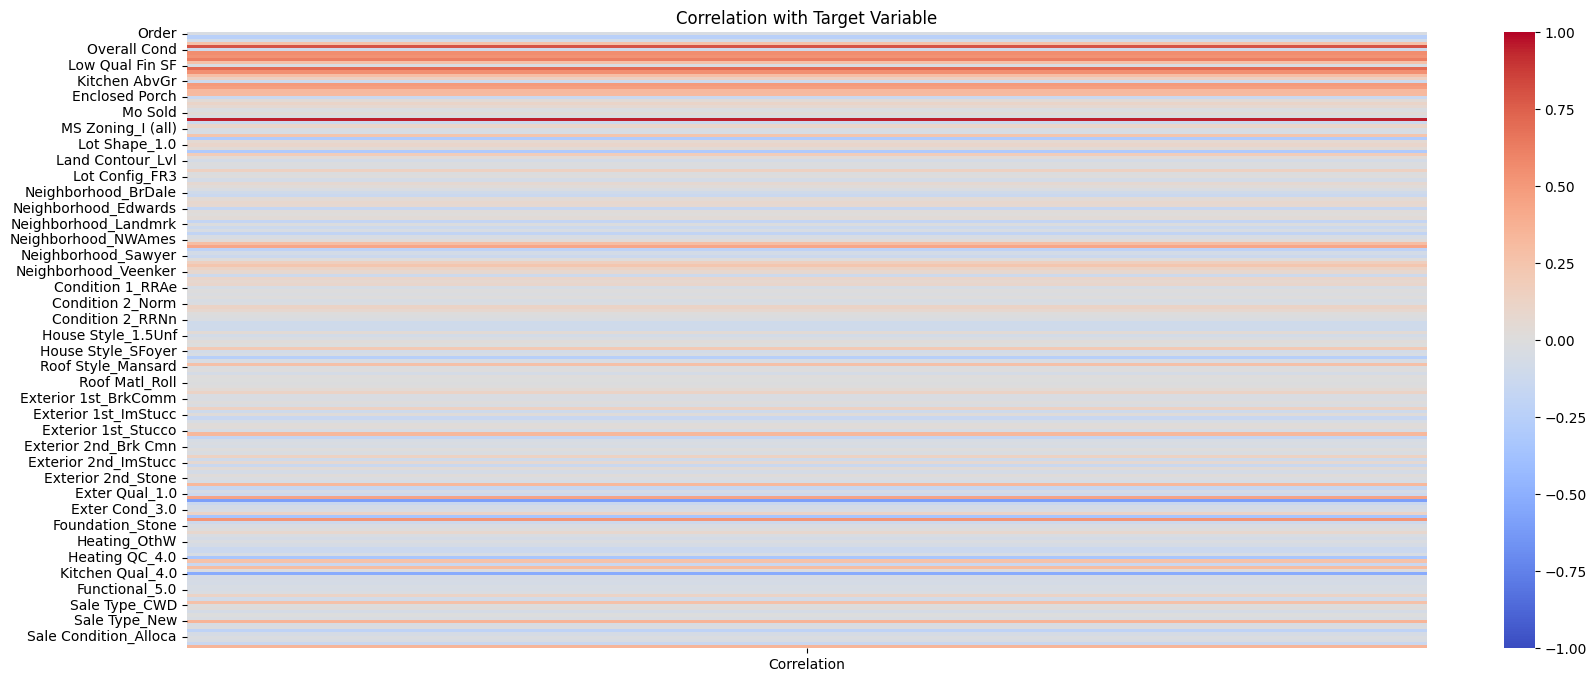

,Correlation
SalePrice,0.946303
Overall Qual,0.799262
Gr Liv Area,0.706780
1st Flr SF,0.621676
Year Built,0.558426
Full Bath,0.545604
Year Remod/Add,0.532974
Foundation_PConc,0.520966
TotRms AbvGrd,0.495474
Fireplaces,0.474558


In [13]:
# put your code for implementing Step 4 in this code block
# you may need

# Corelation matrix
corr_matrix = df.corrwith(numeric_features['SalePrice'])

# Heatmap of correlation matrix
corr_df = corr_matrix.to_frame()
corr_df.columns = ['Correlation']

plt.figure(figsize=(20,8))
sns.heatmap(corr_df, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Target Variable')
plt.show()

# Selecting the top 10 correlated features with SalePrice
corr_df.sort_values('Correlation', ascending=False).head(10)


Step 5: first attempt, apply multiple linear regression on all data points with at least 10 attributes, explain the result.

In [14]:
# put your code for implementing Step 5 in this code block
# you may need statsmodels's function sm.OLS(), sm.add_constant(), model.fit(), results.summary()
import statsmodels.api as sm

# Select the top 10 correlated features with SalePrice
top_correlated_features = corr_df.sort_values('Correlation', ascending=False).head(10).index.tolist()

# Build a linear regression model with selected features
X = df[top_correlated_features]
for col in X.select_dtypes(include='bool').columns:
    X[col] = X[col].astype(int)

X = sm.add_constant(X)
y = df['SalePrice']

model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.013e+27
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        23:49:47   Log-Likelihood:                 84089.
No. Observations:                2930   AIC:                        -1.682e+05
Df Residuals:                    2919   BIC:                        -1.681e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -2.608e-12    2.2e-13  

<ipython-input-14-50451b6e0f88>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(int)


The model has an R-squared and Adjusted R-squared value of 1.000, which indicates a perfect fit. However, this could also suggest potential overfitting.
The F-statistic is approximately 6.915e+29 and the Prob (F-statistic) is 0.00, indicating that the model is statistically significant.
The AIC and BIC values are -1.102e+05 and -1.101e+05 respectively. The lower these values, the better the model fits the data.

Step 6: split the data into train (80%) and test (20%), use train to create multiple linear regression model, apply on test and report RMSE.

In [15]:
# put your code for implementing Step 6 in this code block
# it is highly suggested you switch to sklearn for prediction focus task.
# you may need sklearn's train_test_split(), np.sqrt(), np.mean()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE:", rmse)

LinearRegression()

RMSE: 1.2113892130880473e-13


Step 7: apply Ridge and Lasso, see improvement over step 6.

In [16]:
# put your code for implementing Step 7 in this code block
# you may need
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print("Ridge RMSE:", rmse_ridge)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("Lasso RMSE:", rmse_lasso)

Ridge(alpha=0.1)

Ridge RMSE: 0.00022556661808146612


Lasso(alpha=0.1)

Lasso RMSE: 0.1974858879628654
